<a href="https://colab.research.google.com/github/TungSoPon/AIPrototype2023/blob/main/Tensorflow_(Deep_Learning_Implemen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   Sequential (ง่าย แต่สร้างได้แต่แบบไม่ซับซ้อน(วิ่งเส้นตรง))
2.   Functional (ยากขึ้นมาอีกนิด แต่ไม่สามารถปรับเส้นทางให้ทีความซับซ้อนได้)
3.   Subelassing (ยากสุด แต่สามารถแก้ไข้ได้ตามที่เราต้องการ)





##Import

In [1]:
import tensorflow as tf #ตัวหลักตัวสั่ง GPU
from tensorflow import keras
from tensorflow.keras import layers

##

In [22]:
model = keras.Sequential(
    [
        keras.Input(shape=(4,)),# 4โหนด = 4 Class
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(5, activation="softmax", name="output"),
    ]
)

In [23]:
model.summary()
#ทุกโหนดต้องต่อกัน
#ไบแอดไม่รับ input
# Trainble params คือ สามารถ Train ได้

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 10        
                                                                 
 layer2 (Dense)              (None, 3)                 9         
                                                                 
 output (Dense)              (None, 5)                 20        
                                                                 
Total params: 39 (156.00 Byte)
Trainable params: 39 (156.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Predicct

In [8]:
x = tf.ones((5, 4))

In [11]:
x
# batesize = 5

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

In [24]:
y = model(x)

In [25]:
y

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2]], dtype=float32)>

## สร้าง sequential แบบที่สอง

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=(4,)),# 4โหนด = 4 Class
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(5, name="output"),
    ]
)

In [20]:
model2 = keras.Sequential()
model2.add(keras.Input(shape=(4,)))
model2.add(layers.Dense(2, activation="relu"))
model2.add(layers.Dense(3, activation="relu"))
model2.add(layers.Dense(5, activation="softmax"))

In [21]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
 dense_4 (Dense)             (None, 3)                 9         
                                                                 
 dense_5 (Dense)             (None, 5)                 20        
                                                                 
Total params: 39 (156.00 Byte)
Trainable params: 39 (156.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##ปรับเปลี่ยน Network

In [31]:
model2.pop() # เอา output ออก

In [32]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
 dense_4 (Dense)             (None, 3)                 9         
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
model2.add(layers.Dense(6)) #เพิ่ม output 6 ใหม่

In [34]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
 dense_4 (Dense)             (None, 3)                 9         
                                                                 
 dense_7 (Dense)             (None, 6)                 24        
                                                                 
Total params: 43 (172.00 Byte)
Trainable params: 43 (172.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
x = tf.ones((5, 4))
y = model2(x)
y

<tf.Tensor: shape=(5, 6), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]], dtype=float32)>

## ลองเทรน Sequential model ที่สร้างขึ้นเอง

In [36]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

##load data

In [37]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


## แปลงค่าเป็น 0-1 เพื่อนำเข้า network

In [39]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

## plot รูปตัวอย่าง

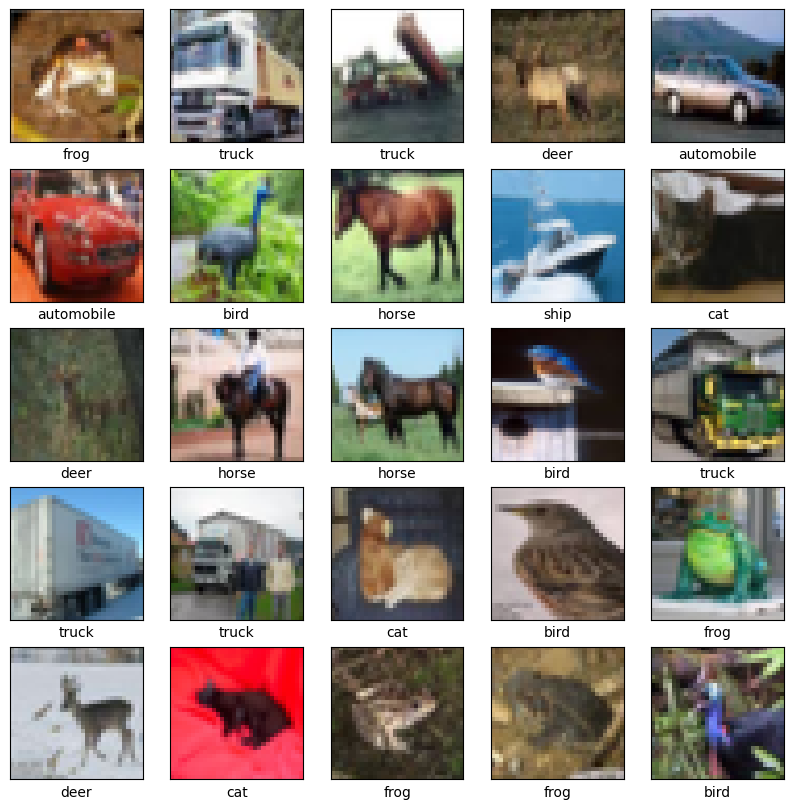

In [40]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Define

In [41]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) # 32*32 มี 3 ชาร์แนล
model.add(layers.MaxPooling2D((2, 2))) # ดูทุกๆ 2 พิเซลแล้วสรุปเป็น 1
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # 3*3 64ฟิวเตอร์
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [42]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

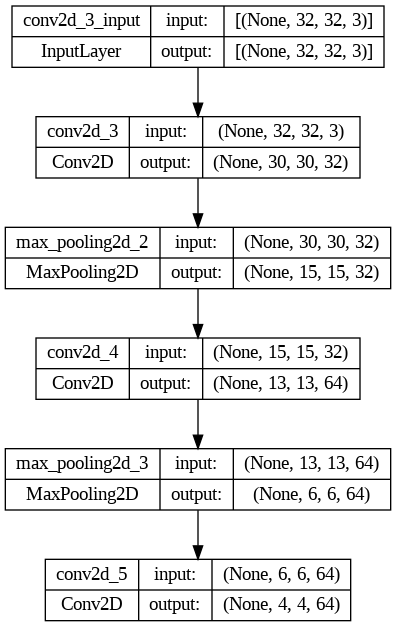

In [43]:
keras.utils.plot_model(model,show_shapes=True)

## ต่อด้วย flatten และ dense เพื่อทำนาย

In [45]:
model.add(layers.Flatten()) #เอา input ทำให้ไม่มีมิติ
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10)) # output 10 class

In [46]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

## Define training parameters

In [47]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train

In [48]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [49]:
history = model.fit(train_images, train_labels, epochs=2,
                    validation_data=(test_images, test_labels))

Epoch 1/2
1563/1563 [==============================] - 85s 53ms/step - loss: 1.5873 - accuracy: 0.4113 - val_loss: 1.3310 - val_accuracy: 0.5065
Epoch 2/2
1563/1563 [==============================] - 73s 47ms/step - loss: 1.2184 - accuracy: 0.5624 - val_loss: 1.2055 - val_accuracy: 0.5713


## Test

ValueError: x and y must have same first dimension, but have shapes (2,) and (10,)

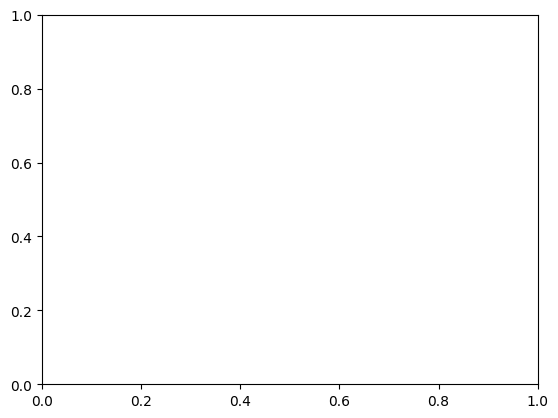

In [62]:
plt.plot([0,1],history.history['loss'], label='loss')
plt.plot([0,1],history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 1])
plt.legend(loc='upper right')

In [51]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 3s - loss: 1.2055 - accuracy: 0.5713 - 3s/epoch - 11ms/step


In [52]:
print(test_acc)

0.5713000297546387


## Functional

In [53]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [55]:
input_images = keras.Input(shape=(32, 32, 3), name="img") # กำหนด input ให้มีขนาดเป็น 32*32*3
model = layers.Conv2D(32, (3, 3), activation="relu", name="conv1")(input_images) # (input_images) input จาก layer ก่อนหน้า
model = layers.MaxPooling2D((2, 2), name="maxpool1")(model)
model = layers.Conv2D(64, (3, 3), activation='relu', name="conv2")(model)
model = layers.MaxPooling2D((2, 2), name="maxpool2")(model)
model = layers.Conv2D(64, (3, 3), activation='relu', name="conv3")(model)
model = layers.Flatten(name="Flatten")(model)
model = layers.Dense(64, activation='relu', name="activation")(model)
output = layers.Dense(10, name="output")(model)

In [57]:
my_model = keras.Model(input_images, output, name = "mymodel") #บอกว่า input คือ Layer ไหน output Layer ไหน

In [58]:
my_model.summary()

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 30, 30, 32)        896       
                                                                 
 maxpool1 (MaxPooling2D)     (None, 15, 15, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 13, 13, 64)        18496     
                                                                 
 maxpool2 (MaxPooling2D)     (None, 6, 6, 64)          0         
                                                                 
 conv3 (Conv2D)              (None, 4, 4, 64)          36928     
                                                                 
 Flatten (Flatten)           (None, 1024)              0   

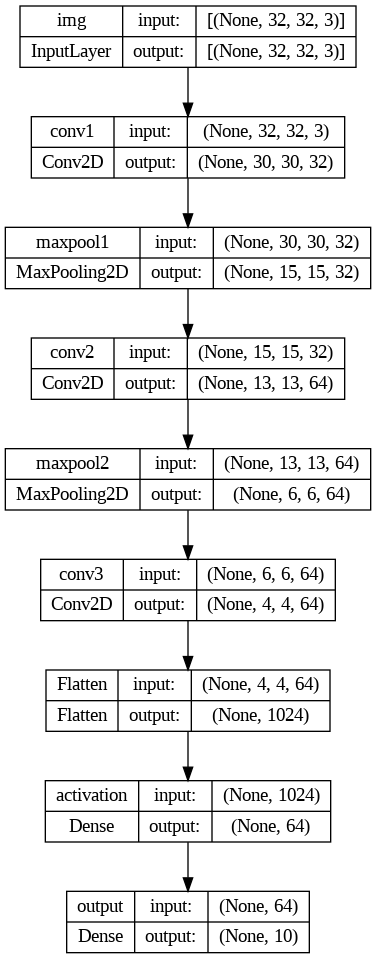

In [59]:
keras.utils.plot_model(my_model, show_shapes=True)

In [60]:
my_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [61]:
history = my_model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 91s 58ms/step - loss: 1.5263 - accuracy: 0.4438 - val_loss: 1.2750 - val_accuracy: 0.5427
Epoch 2/10
1563/1563 [==============================] - 83s 53ms/step - loss: 1.1570 - accuracy: 0.5918 - val_loss: 1.1176 - val_accuracy: 0.6053
Epoch 3/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.0097 - accuracy: 0.6442 - val_loss: 0.9915 - val_accuracy: 0.6513
Epoch 4/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9126 - accuracy: 0.6818 - val_loss: 0.9743 - val_accuracy: 0.6529
Epoch 5/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.8423 - accuracy: 0.7039 - val_loss: 0.9092 - val_accuracy: 0.6823
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7863 - accuracy: 0.7222 - val_loss: 0.8713 - val_accuracy: 0.6987
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7360 - accuracy: 0.7414 - val_loss: 0.8764 -

313/313 - 4s - loss: 0.8386 - accuracy: 0.7162 - 4s/epoch - 14ms/step


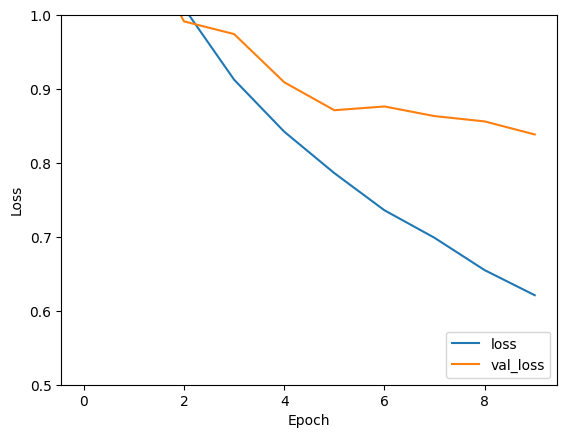

In [63]:
plt.plot(range(10),history.history['loss'], label='loss')
plt.plot(range(10),history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1]) #กำหลดแกน XY
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)

In [64]:
print(test_acc)

0.7161999940872192


## ResNet

In [65]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

resnet_model = keras.Model(inputs, outputs, name="toy_resnet")
resnet_model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_6 (Conv2D)           (None, 30, 30, 32)           896       ['img[0][0]']                 
                                                                                                  
 conv2d_7 (Conv2D)           (None, 28, 28, 64)           18496     ['conv2d_6[0][0]']            
                                                                                                  
 max_pooling2d_4 (MaxPoolin  (None, 9, 9, 64)             0         ['conv2d_7[0][0]']            
 g2D)                                                                                    

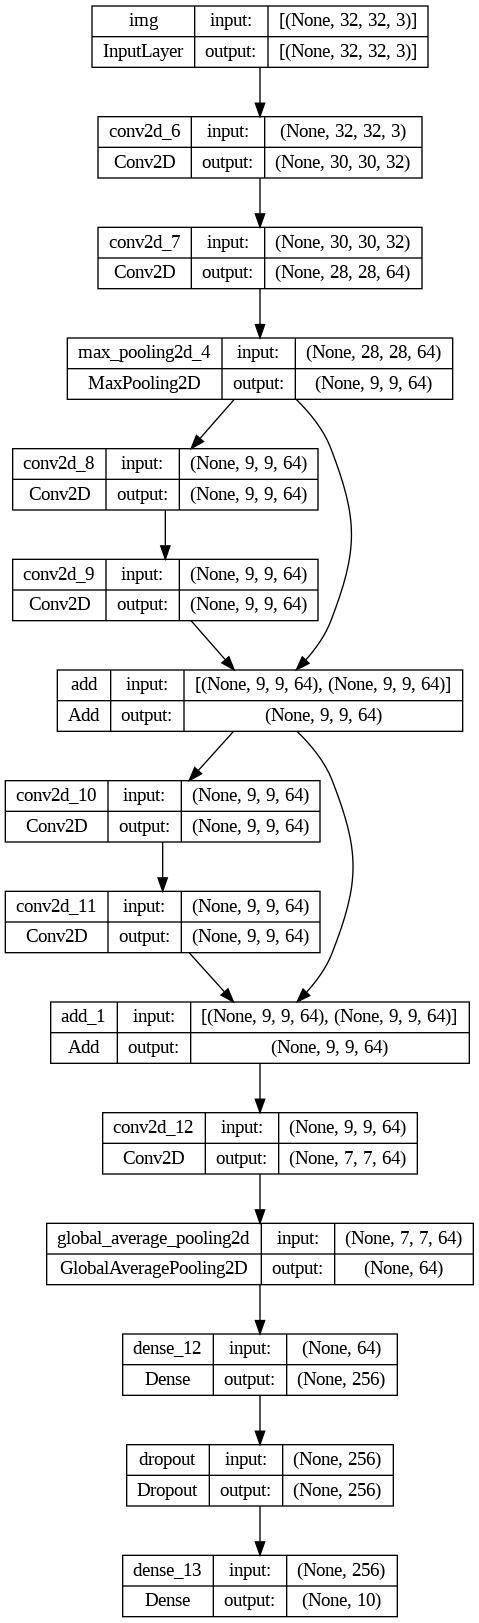

In [66]:
keras.utils.plot_model(resnet_model,  show_shapes=True)

In [67]:
resnet_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = resnet_model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

In [ ]:
plt.plot(range(10),history.history['loss'], label='loss')
plt.plot(range(10),history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1.7])
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

## Tensorflow Data Pipeline
#คือ ให้โหลด Data มาทีละส่วนๆ เหมือนสร้างโฟลเดอร์ไว้ในไดฟ์

flow from directory

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [71]:
path2data = '/content/drive/MyDrive/Classification Dataset'

In [72]:
inputs = keras.Input(shape=(200, 200, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(2)(x)

resnet_model_dm = keras.Model(inputs, outputs, name="resnet_dog_muff")
resnet_model_dm.summary()

Model: "resnet_dog_muff"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv2d_13 (Conv2D)          (None, 198, 198, 32)         896       ['img[0][0]']                 
                                                                                                  
 conv2d_14 (Conv2D)          (None, 196, 196, 64)         18496     ['conv2d_13[0][0]']           
                                                                                                  
 max_pooling2d_5 (MaxPoolin  (None, 65, 65, 64)           0         ['conv2d_14[0][0]']           
 g2D)                                                                               

In [80]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40, #อันนี้หมุน
      width_shift_range=0.2, # ยืดแนวนอน
      height_shift_range=0.2, # แนวตั้ง
      shear_range=0.2,
      zoom_range=0.2, # ซูม
      horizontal_flip=True,
      fill_mode='nearest') #สลับด้าน

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        path2data,
        # All images will be resized to target height and width.
        target_size=(200, 200),
        batch_size=4, # ข้อมูลเข้าทีละ 4
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

# # Note that the validation data should not be augmented!
# test_datagen = ImageDataGenerator(rescale=1./255)
# validation_generator = test_datagen.flow_from_directory(
#         validation_dir,
#         target_size=(height, width),
#         batch_size=batch_size,
#         class_mode='categorical')

Found 30 images belonging to 2 classes.


In [78]:
from tensorflow.keras import optimizers

In [82]:
resnet_model_dm.compile(optimizer=optimizers.Adam(lr=2e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [83]:
history = resnet_model_dm.fit_generator(
      train_generator,
      steps_per_epoch= 7,
      epochs=50,
      verbose=1)

Epoch 1/50


KeyboardInterrupt: 